In [1]:
!pip install transformers tokenizers datasets huggingface_hub --quiet
##Shushant/nepaliBERT
### raygx/NepCovidHealthNews
#### raygx/NepCov19Tweets

import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed
import datasets

rand_seed = 9

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    set_seed(seed)
    
seed_everything(rand_seed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 4.0 MB/s eta 0:00:00


In [2]:
# from huggingface_hub import notebook_login
# notebook_login()

# Loading Model and Tokenizer

In [3]:
from transformers import AutoConfig
from transformers import BertTokenizerFast
from transformers import TFAutoModelForSequenceClassification, PreTrainedTokenizerFast

use_config = False # When True initializes the model with random weights and when true initilizes the model with pretrained weigths

print("Loading Model 'distilbert-base-uncased")
if use_config:
  print("Intialization: New")
  tokenizer = PreTrainedTokenizerFast.from_pretrained('Shushant/nepaliBERT')
  config = AutoConfig.from_pretrained(
            'distilbert-base-uncased',
            bos_token_id=tokenizer.bos_token_id,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2}
          )
  
  model = TFAutoModelForSequenceClassification.from_config(config)
else:
  print("Intialization: Pretrained")
  model = TFAutoModelForSequenceClassification.from_pretrained('Shushant/nepaliBERT',from_pt=True,
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})

  tokenizer = BertTokenizerFast.from_pretrained("Shushant/nepaliBERT")
  
model.resize_token_embeddings(len(tokenizer))

Loading Model 'distilbert-base-uncased
Intialization: Pretrained


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<tf.Variable 'tf_bert_for_sequence_classification/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32, numpy=
array([[-1.0126330e-02,  6.0940760e-01, -1.2932321e-02, ...,
        -4.0139150e-02, -3.8403878e-01, -1.5108096e-02],
       [ 1.6540168e-02,  5.3137284e-02, -7.6477025e-03, ...,
         2.9101238e-02, -7.0671774e-02,  4.2947892e-02],
       [ 7.9220347e-03,  1.0469845e-01,  3.1660851e-02, ...,
         3.2496277e-02, -4.0235545e-02, -4.1500717e-02],
       ...,
       [ 1.4784136e-02,  2.4127005e-01,  6.6819601e-03, ...,
         1.9043359e-04, -2.3841731e-01, -2.8261753e-02],
       [ 6.4263128e-02,  2.5852656e-01,  3.3777559e-03, ...,
        -1.1481761e-02, -2.8464749e-01,  2.9687393e-02],
       [-2.9865343e-03,  2.5343245e-01,  2.3266962e-02, ...,
         1.4173536e-02, -2.7037045e-01, -4.7388423e-02]], dtype=float32)>

In [4]:
print(model.config)
print(model.summary())

BertConfig {
  "_name_or_path": "Shushant/nepaliBERT",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer

In [5]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=1e-6, weight_decay_rate=0.001)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


# Data Loading and Preparation

In [6]:
data = datasets.load_dataset("raygx/NepCov19Tweets")
data = data.rename_columns({"Sentiment":"labels","Sentences":"text"})
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/33471 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/raygx___parquet/raygx--NepCov19Tweets-11ff376905985191/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33471
    })
})

In [7]:
data = data.shuffle(999)
data = data['train'].train_test_split(test_size=0.2)
data

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})

In [8]:
def LabelEncoding(x):
    if x['labels']==0:
        x['labels'] = 0#[1,0,0]
    if x['labels']==1:
        x['labels'] =  1#[0,1,0]
    if x['labels']==-1:
        x['labels'] =  2#[0,0,1]
    
    return x

data = data.map(
        LabelEncoding,
        num_proc=4)

print(data)

Map (num_proc=4):   0%|          | 0/26776 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/6695 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})


In [9]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=2,
    remove_columns=data["train"].column_names,
)
tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['labels']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['labels']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/26776 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=2):   0%|          | 0/6695 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 457 ms, sys: 246 ms, total: 702 ms
Wall time: 11.4 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6695
    })
})

In [10]:
print(data['train'][:1])
print(tokenized_inputs['train'][:1]['input_ids'])
print(tokenizer.batch_decode(tokenized_inputs['train'][:1]['input_ids']))

{'labels': [1], 'text': ['कोभिड बारे बेलायतका प्रधानमन्त्री बोरिस जन्सनको सुझाव']}
[[2, 1805, 1842, 1051, 2588, 3769, 2121, 1677, 1996, 1809, 2822, 21435, 2174, 19225, 10535, 1921, 401, 2859, 1008, 4]]
['[CLS] कोभिड बार बलायतका परधानमनतरी बोरिस जनसनको सझाव [SEP]']


In [11]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [12]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


# Training and Evaluation

## Training Section

In [13]:
%%time

n_epoch = 5
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/5
1673/1673 [==============================] - 571s 321ms/step - loss: 0.8096 - val_loss: 0.7200
Epoch 2/5
1673/1673 [==============================] - 529s 316ms/step - loss: 0.6789 - val_loss: 0.6691
Epoch 3/5
1673/1673 [==============================] - 530s 317ms/step - loss: 0.6341 - val_loss: 0.6525
Epoch 4/5
1673/1673 [==============================] - 530s 317ms/step - loss: 0.6028 - val_loss: 0.6266
Epoch 5/5
1673/1673 [==============================] - 533s 318ms/step - loss: 0.5775 - val_loss: 0.6255
{'loss': [0.8096216320991516, 0.6788703799247742, 0.6341201663017273, 0.6028287410736084, 0.577523410320282], 'val_loss': [0.7199624180793762, 0.6690804362297058, 0.6525100469589233, 0.6265636682510376, 0.6254604458808899]}
CPU times: user 31min 33s, sys: 3min 59s, total: 35min 33s
Wall time: 46min 51s


<Axes: >

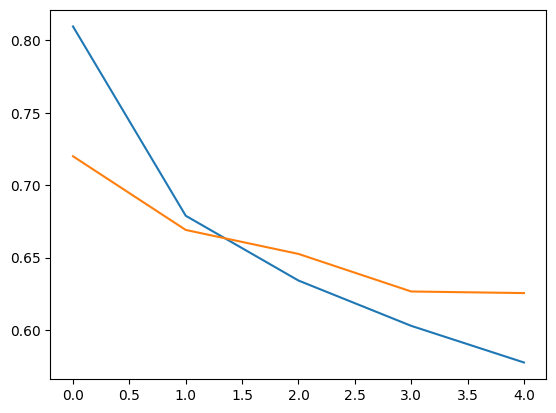

In [14]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation Section

In [38]:
%%time
from transformers import pipeline, TextClassificationPipeline

pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
prediction = pipe(data['test']['text'])
pred_labels = [model.config.label2id[x['label']] for x in prediction]
actual_labels = data['test']['labels']

CPU times: user 22min 22s, sys: 2.78 s, total: 22min 25s
Wall time: 22min 42s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.7277227445970987
Precision-Score 0.7311309026760062
Recall-Score 0.7421956684092607
accuracy_Score 0.7421956684092607


**Plotting Confusion Matrix**

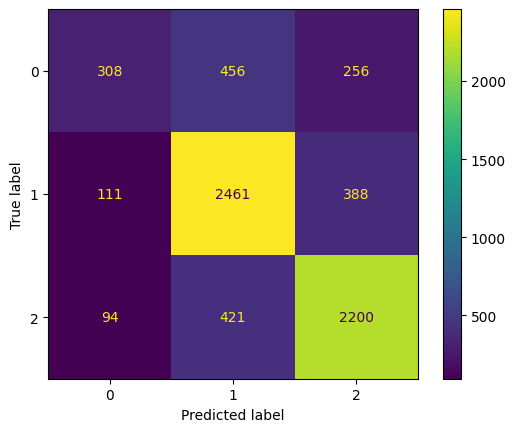

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()

**Pushing Model to Huggingface Hub**

In [ ]:
### Pushing Model to hub
# if using=='gpt':
#   model.push_to_hub("raygx/GPT2-NepSA-T1",commit_message="Training From Scratch:Distilgpt2;3L4H:Batch 1:Epoch 20; lr=2e-6")

# 1/0